In [1]:
import FHMM
import cPickle as pk
import pandas as pd
from hmmlearn.hmm import GaussianHMM
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Users/nelly/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [7]:
labels = pd.read_table('https://s3.amazonaws.com/ngalvbucket1/house_1/labels.dat',sep=' ',header=None)
print labels

     0                     1
0    1             aggregate
1    2                boiler
2    3    solar_thermal_pump
3    4                laptop
4    5       washing_machine
5    6            dishwasher
6    7                    tv
7    8        kitchen_lights
8    9                  htpc
9   10                kettle
10  11               toaster
11  12                fridge
12  13             microwave
13  14            lcd_office
14  15           hifi_office
15  16            breadmaker
16  17        amp_livingroom
17  18           adsl_router
18  19     livingroom_s_lamp
19  20        soldering_iron
20  21         gigE_&_USBhub
21  22                hoover
22  23       kitchen_dt_lamp
23  24       bedroom_ds_lamp
24  25      lighting_circuit
25  26    livingroom_s_lamp2
26  27          iPad_charger
27  28  subwoofer_livingroom
28  29    livingroom_lamp_tv
29  30  DAB_radio_livingroom
30  31         kitchen_lamp2
31  32  kitchen_phone&stereo
32  33        utilityrm_lamp
33  34       s

In [3]:
class Appliance():
    def __init__(self, name, power_data):
        self.name =  name
        self.power_data = power_data

In [2]:
with open('/Users/nelly/Galvanize/Capstone/Electricity-load-prediction/data/4app_train.pkl') as f:
    four_app_train = pk.load(f)

with open('/Users/nelly/Galvanize/Capstone/Electricity-load-prediction/data/4app_test.pkl') as f:
    four_app_test = pk.load(f)

In [85]:
four_app_test.sum().sort_index().values


array([  2.15255581e+06,   4.99642460e+02,   8.08987098e+05,
        -2.27373675e-13,   7.61758840e+05,   1.00000000e+00,
         5.87829088e+05,  -2.84217094e-14])

AttributeError: 'FigureCanvasAgg' object has no attribute 'invalidate'

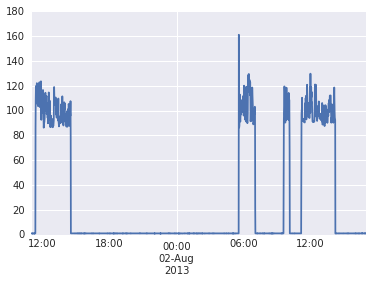

In [77]:
subset = four_app_test['2013-08-01 11:00:00':'2013-08-02 17:00:00'][['channel_7']]
subset.plot()

In [74]:
channel_12 = four_app_train[(four_app_train['channel_12'] > 2)][['channel_12']]
print channel_12;


                     channel_12
date                           
2013-06-01 00:00:00   88.125000
2013-06-01 00:01:00   83.555556
2013-06-01 00:02:00   83.428571
2013-06-01 00:03:00   86.222222
2013-06-01 00:04:00   87.857143
2013-06-01 00:05:00   89.000000
2013-06-01 00:06:00   89.125000
2013-06-01 00:07:00   90.444444
2013-06-01 00:08:00   87.714286
2013-06-01 00:09:00   88.375000
2013-06-01 00:10:00   86.111111
2013-06-01 00:11:00   85.750000
2013-06-01 00:12:00   85.750000
2013-06-01 00:13:00   87.555556
2013-06-01 00:14:00   85.555556
2013-06-01 00:15:00   89.222222
2013-06-01 00:16:00   86.000000
2013-06-01 00:17:00   89.555556
2013-06-01 00:18:00   85.750000
2013-06-01 00:19:00   85.777778
2013-06-01 00:20:00   85.111111
2013-06-01 00:21:00   85.444444
2013-06-01 00:22:00   87.000000
2013-06-01 00:23:00   87.555556
2013-06-01 00:24:00   85.666667
2013-06-01 00:25:00   86.000000
2013-06-01 00:26:00   89.571429
2013-06-01 00:27:00   88.250000
2013-06-01 00:28:00   86.111111
2013-06-

AttributeError: 'FigureCanvasAgg' object has no attribute 'invalidate'

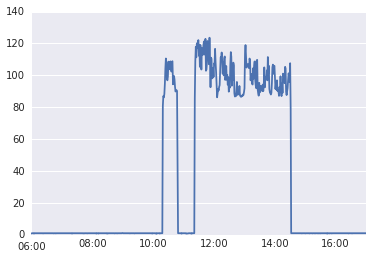

In [43]:
# print four_app_test[four_app_train.columns[::2]] 
four_app_test[['channel_7']]['2013-08-01 06:00:00':'2013-08-01 17:00:00'].plot();

In [4]:
app_train_list = []
app_test_list = []
for channel in four_app_train.columns[::2]:
    app_train_list.append(Appliance(channel,four_app_train[[channel]]))
    app_test_list.append(Appliance(channel,four_app_test[[channel]]))

In [5]:
app_train_list[0].power_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 44640 entries, 2013-06-01 00:00:00 to 2013-07-01 23:59:00
Freq: T
Data columns (total 1 columns):
channel_12    44634 non-null float64
dtypes: float64(1)
memory usage: 697.5 KB


In [23]:
power_data = app_train_list[0].power_data.fillna(value = 0,inplace = False)
X = power_data.values.reshape((-1, 1))
X_test = app_train_list[2].power_data.fillna(value = 0,inplace = False).values.reshape((-1, 1))
print [X]
print X_test

[array([[ 88.125     ],
       [ 83.55555556],
       [ 83.42857143],
       ..., 
       [ 88.11111111],
       [ 87.44444444],
       [ 86.77777778]])]
[[ 1.]
 [ 1.]
 [ 1.]
 ..., 
 [ 1.]
 [ 1.]
 [ 1.]]


In [24]:
hmm = GaussianHMM(n_components = 2, n_iter = 1000)
hmm.fit(X)

GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=2, n_iter=1000, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=False)

In [27]:
print hmm.score_samples(X_test)


(-333379.33392992622, array([[ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       ..., 
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.]]))


In [9]:
predictX

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
sh_score = silhouette_score(X, predictX)

In [7]:
num_states_dict={}
for channel in four_app_train.columns[::2]:
    num_states_dict[channel]=2

In [8]:
fhmm = FHMM.FHMM()
fhmm.train([app_train_list[0]], num_states_dict = num_states_dict)

Training model for appliance 'channel_12 with 2 hidden states'


AttributeError: 'GaussianHMM' object has no attribute 'startprob_'

In [24]:
data = app_train_list[0].power_data
X = data.fillna(value = 0,inplace = False)
# X = power_data.values.reshape((-1, 1))
